In [1]:
import matplotlib.pyplot as plt
import numpy as np

from MembraneAnalysisToolbox.MembraneStructures import (
    HexagonalMembrane,
    Membrane,
    MembraneForDiffusionAnalysis,
)
from MembraneAnalysisToolbox.PoreAnalysis import PoreAnalysis

/bigpool/users/st166545/MembraneAnalysisToolbox/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Results will not be saved because no results folder has been specified.
Allocating trajectories for selectors: "resname C".
	Progress: 100%
Trajectories allocated.
Lower boundary of the hexagonal structure: 233.23501586914062


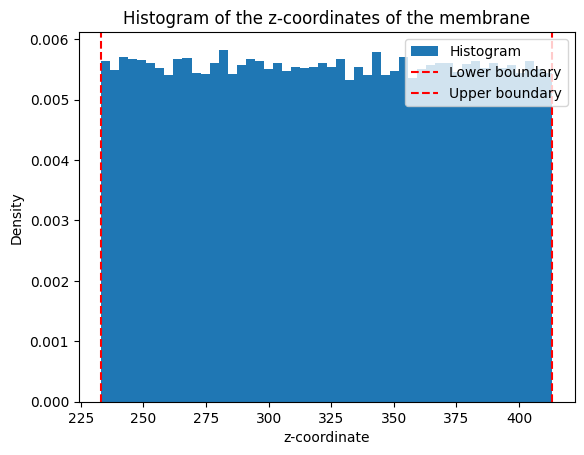

In [2]:
membrane = HexagonalMembrane(L=180, selectors="resname C")

PA = PoreAnalysis(
    topology_file="/bigpool/users/st166545/MembraneAnalysisToolbox/tests/data/hex_box_hex_dod/topol.tpr",
    trajectory_file="/bigpool/users/st166545/MembraneAnalysisToolbox/tests/data/hex_box_hex_dod/traj.xtc",
    membrane=membrane,
    analysis_max_step_size_ps=10000,
    verbose=True,
)

PA.find_membrane_location()
PA.print_membrane_location()
PA.verify_membrane_location()

In [3]:
PA._allocateTrajectories(["resname HEX and name C1"])

Allocating trajectories for selectors: "resname HEX and name C1".
	Progress: 19%

	Progress: 100%
Trajectories allocated.


In [4]:
# z_vals_c = PA.trajectories["resname C"][:, :, 0].flatten()
# z_vals_c1 = PA.trajectories["resname HEX and name C1"][:, :, 0].flatten()

In [5]:
# hist, hist_edges = np.histogram(z_vals_c, bins=100, density=False)
# hist_c1, hist_edges_c1 = np.histogram(z_vals_c1, bins=100, density=False)
# x = hist_edges[:-1] + np.diff(hist_edges) / 2
# x_c1 = hist_edges_c1[:-1] + np.diff(hist_edges_c1) / 2
# plt.figure()
# plt.plot(x, hist)
# plt.plot(x_c1, hist_c1)

(251.23501586914062, 395.2350158691406)
(4190, 201, 3)
(38675, 2)
Kde faktoren (mem, solv): 0.13


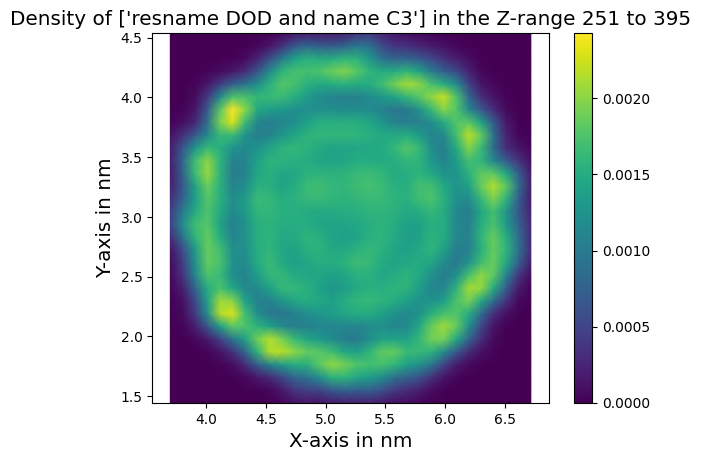

In [20]:
print(PA.membrane.find_zConstraints())
PA.analyseDensity(
    selectors=["resname DOD and name C3"],
    z_range=PA.membrane.find_zConstraints(),
    skip= 1,
    bw=0.13
    )

(251.23501586914062, 395.2350158691406)
(967, 2)
(63870, 2)
Kde faktor: 0.13
Kde faktor: 0.13
[0.0032057957916988983, 0.0004703676991673138]


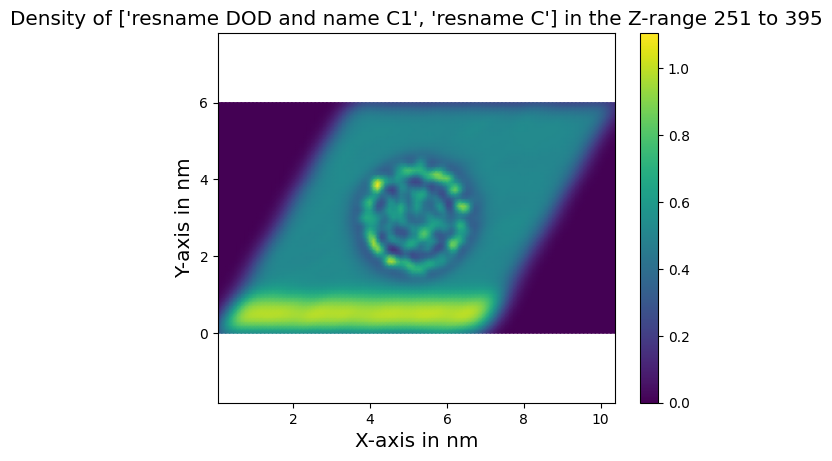

In [13]:
print(PA.membrane.find_zConstraints())
PA.analyseDensityNormed(
    selectors=["resname DOD and name C1", "resname C"],
    z_range=PA.membrane.find_zConstraints(),
    skip= 50,
    bw=0.13
    )

/bigpool/users/st166545/MembraneAnalysisToolbox/.venv/lib/python3.12/site-packages/MembraneAnalysisToolbox/PoreAnalysis.py:321: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


(37.58155496354784, 66.52886299248097)
The effective pore size is: 28.94730802893313


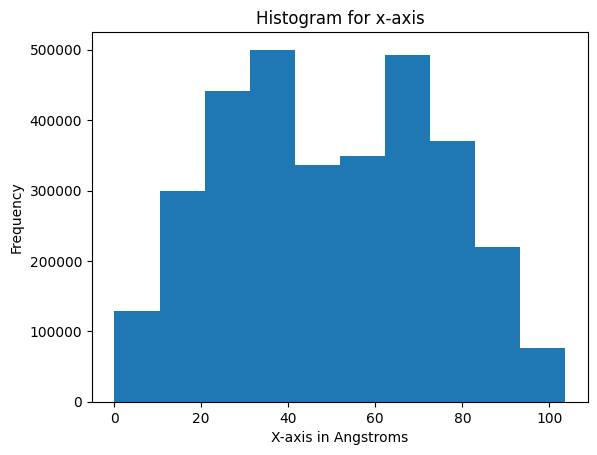

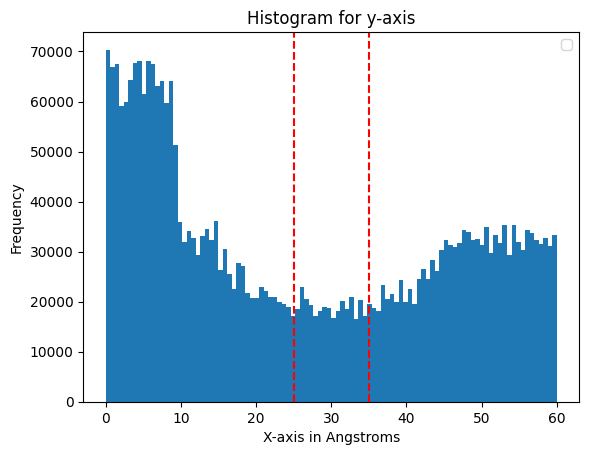

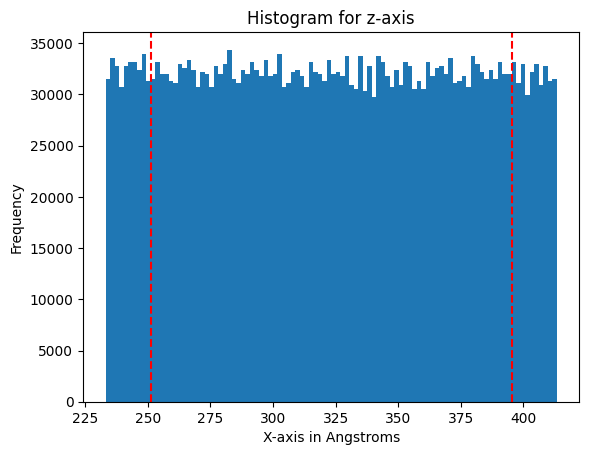

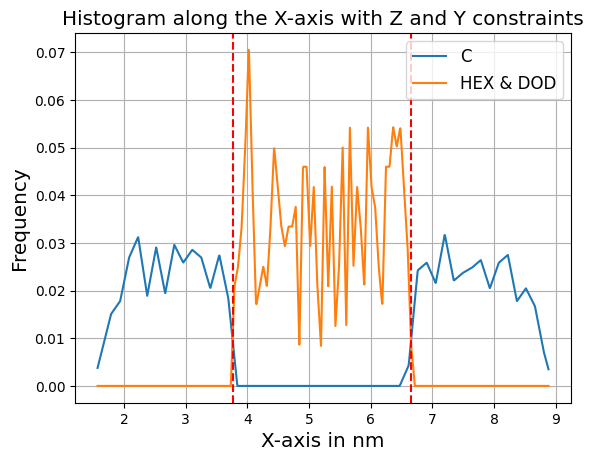

In [8]:
PA.analyseConstraints(
    "resname C",
    y_constraints=(25,35),
    z_constraints=PA.membrane.find_zConstraints(),
)
edges = PA.calculateEffectivePoreSize(
    solvent_selectors=["resname HEX and name C1"],
    z_constraints=PA.membrane.find_zConstraints(),
    y_constraints=(25,35),
    strategy="intersection",
    bins=50,
)
print(edges)
print(f"The effective pore size is: {edges[1] - edges[0]}")

(113, 113) (114,) (114,)
lets minimize
Optimal m_x: 30.0
Optimal m_y: 50.0
Optimal r: 15.0


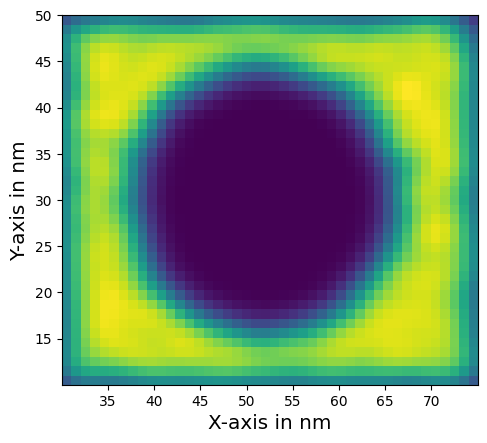

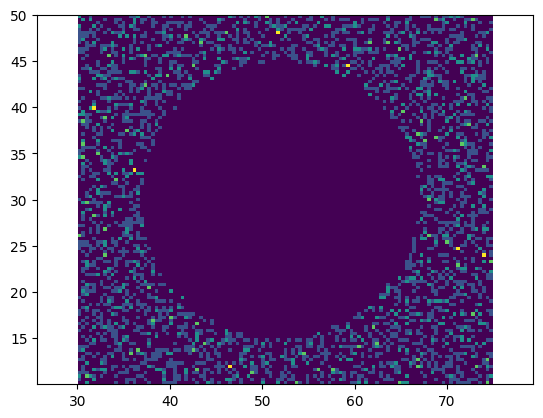

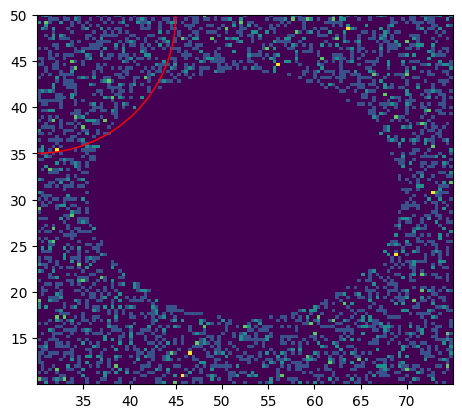

In [9]:
PA.findPoreCenter(
    z_constraints=PA.membrane.find_zConstraints(),
    skip= 100,
    bw = 0.13,
    x_threshold= (30,75),
    y_threshold= (10,50),
)